# Arrest Data: Preprocessing, Exploratory Analysis & Visualizations

This notebook covers data cleaning and feature engineering, followed by exploratory data analysis (EDA) and visualizations of Pittsburgh arrest data from 2020 to 2023. It includes demographic trends, temporal patterns, and geographic arrest density insights to inform modeling and policy evaluation.


In [1]:
import warnings
warnings.filterwarnings("ignore")

## Importing the required libraries

In [2]:
# ----------------------------------------
# Core Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# Data Preprocessing
# ----------------------------------------
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Data Preprocessing

### 1. Load the data

In [3]:
df = pd.read_csv('arrest_data_2020_2023_1.csv')

### 2. Inspect the data

In [4]:
df.columns = df.columns.str.strip()
df.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,ORIGINAL_ROW,ARREST_YEAR
0,43586,2022657,18139346,29.0,F,W,2020-01-02 13:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",13(a)(16) Possession of Controlled Substance /...,"Sandusky ST & Sutton ST Pittsburgh, PA 15214",Fineview,1,2509.0,NaN,NaN,NaN,NaN,37794,2020
1,43588,2022659,19108989,27.0,M,B,2020-01-01 16:30:00,"1100 Block Banksville RD Pittsburgh, PA 15216",2705 Recklessy Endangering Another Person. / 4...,"90 Block Pasadena ST Pittsburgh, PA 15211",Mount Washington,3,1807.0,3.0,5.0,-80.001842,40.422590,37796,2020
2,43589,2022660,19147249,19.0,M,B,2020-01-01 00:48:00,"2700 Block Glen Mawr ST Pittsburgh, PA 15204","6105(a)(1) Persons not to possess, use, manufa...","Federal ST N & Henderson ST Pittsburgh, PA 15212",Central North Side,1,2206.0,6.0,1.0,-80.007751,40.458871,37797,2020
3,43590,2022661,19154938,52.0,M,B,2020-01-03 10:00:00,Zone 5,2701 Simple Assault. / 2702 Aggravated Assault...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN,37798,2020
4,43592,2022663,19162591,19.0,M,B,2020-01-01 00:48:00,"2700 Block Glen Mawr ST Pittsburgh, PA 15204","6105(a)(1) Persons not to possess, use, manufa...","2900 Block Mullins ST Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.031963,40.470411,37800,2020


### 3. Understand Data Columns

In [5]:
print("Column Names:", df.columns.tolist())
df.info()

Column Names: ['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y', 'ORIGINAL_ROW', 'ARREST_YEAR']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28469 entries, 0 to 28468
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    28469 non-null  int64  
 1   PK                     28469 non-null  int64  
 2   CCR                    28469 non-null  int64  
 3   AGE                    28361 non-null  float64
 4   GENDER                 28469 non-null  object 
 5   RACE                   28469 non-null  object 
 6   ARRESTTIME             28469 non-null  object 
 7   ARRESTLOCATION         28469 non-null  object 
 8   OFFENSES               28469 non-null  object 
 9   INCIDENTLOCATION       28469 non-null  object 


### 4. Data description

In [6]:
df.describe()

,_id,PK,CCR,AGE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,ORIGINAL_ROW,ARREST_YEAR
count,28469.000000,2.846900e+04,2.846900e+04,28361.000000,27410.000000,23123.000000,23123.000000,23620.000000,23620.000000,28469.000000,28469.000000
mean,67044.503987,2.043307e+06,2.138947e+07,34.553260,1605.985224,4.881936,3.056135,-79.974683,40.442958,52227.580948,2021.405142
std,13006.355073,1.198579e+04,1.166212e+06,12.500175,927.568012,2.761297,1.629367,0.049072,0.024611,8231.371801,1.116369
min,43586.000000,2.022657e+06,1.309809e+07,0.000000,103.000000,1.000000,0.000000,-80.255272,40.324597,37794.000000,2020.000000
25%,55704.000000,2.032759e+06,2.018435e+07,25.000000,1106.000000,3.000000,2.000000,-80.005266,40.428593,45104.000000,2020.000000
50%,67447.000000,2.043183e+06,2.116810e+07,32.000000,1608.000000,5.000000,3.000000,-79.986483,40.448226,52228.000000,2021.000000
75%,78610.000000,2.053577e+06,2.216265e+07,42.000000,2206.000000,7.000000,5.000000,-79.936477,40.458682,59357.000000,2022.000000
max,88300.000000,2.064640e+06,2.318039e+07,90.000000,7799.000000,9.000000,6.000000,-79.733210,40.617817,66482.000000,2023.000000


### 5. Handle Missing Values

In [7]:
df.isna().sum()

_id                         0
PK                          0
CCR                         0
AGE                       108
GENDER                      0
RACE                        0
ARRESTTIME                  0
ARRESTLOCATION              0
OFFENSES                    0
INCIDENTLOCATION            0
INCIDENTNEIGHBORHOOD     1060
INCIDENTZONE               46
INCIDENTTRACT            1059
COUNCIL_DISTRICT         5346
PUBLIC_WORKS_DIVISION    5346
X                        4849
Y                        4849
ORIGINAL_ROW                0
ARREST_YEAR                 0
dtype: int64

##### 5a. DROP rows with missing in critical fields

In [8]:
df = df.dropna(subset=["AGE", "OFFENSES", "X", "Y", "INCIDENTTRACT", "PUBLIC_WORKS_DIVISION"])

##### 5b. DROP unused or irrelevant columns

In [9]:
df = df.drop(columns=[
    "_id", "PK", "CCR", "ORIGINAL_ROW"
], errors="ignore")

##### 5c. IMPUTE missing values with "Unknown"

In [10]:
df["INCIDENTNEIGHBORHOOD"] = df["INCIDENTNEIGHBORHOOD"].fillna("Unknown")
df["COUNCIL_DISTRICT"] = df["COUNCIL_DISTRICT"].fillna("Unknown")
df["INCIDENTZONE"] = df["INCIDENTZONE"].fillna("Unknown")

##### 5d. Remove invalid ages (since we found a min age of 0 in the describe)

In [11]:
df = df[df["AGE"] > 0]

#### 5e. Time feature extraction 

In [12]:
df["ARRESTTIME"] = pd.to_datetime(df["ARRESTTIME"], errors='coerce')
df["ARREST_YEAR"] = df["ARRESTTIME"].dt.year
df["ARREST_MONTH"] = df["ARRESTTIME"].dt.month
df["ARREST_HOUR"] = df["ARRESTTIME"].dt.hour
df["ARREST_DAY"] = df["ARRESTTIME"].dt.day_name()

#### 5f.  Extract zip code from ARRESTLOCATION  and INCIDENTLOCATION and drop those full text location fields

In [13]:
df["ZIP_ARREST"] = df["ARRESTLOCATION"].astype(str).str.extract(r'(\b\d{5}\b)')
df["ZIP_INCIDENT"] = df["INCIDENTLOCATION"].astype(str).str.extract(r'(\b\d{5}\b)')
df = df.drop(columns=["ARRESTLOCATION", "INCIDENTLOCATION"], errors="ignore")
df = df.dropna(subset=["ZIP_ARREST", "ZIP_INCIDENT"])

## 6.Final Dataset Shape and Sample

In [14]:
print("Final dataset shape:", df.shape)
df.head()

Final dataset shape: (22968, 18)


,AGE,GENDER,RACE,ARRESTTIME,OFFENSES,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,ARREST_YEAR,ARREST_MONTH,ARREST_HOUR,ARREST_DAY,ZIP_ARREST,ZIP_INCIDENT
1,27.0,M,B,2020-01-01 16:30:00,2705 Recklessy Endangering Another Person. / 4...,Mount Washington,3,1807.0,3.0,5.0,-80.001842,40.422590,2020,1,16,Wednesday,15216,15211
2,19.0,M,B,2020-01-01 00:48:00,"6105(a)(1) Persons not to possess, use, manufa...",Central North Side,1,2206.0,6.0,1.0,-80.007751,40.458871,2020,1,0,Wednesday,15204,15212
4,19.0,M,B,2020-01-01 00:48:00,"6105(a)(1) Persons not to possess, use, manufa...",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.031963,40.470411,2020,1,0,Wednesday,15204,15212
5,35.0,M,W,2020-01-03 12:30:00,2701 Simple Assault. / 3701 Robbery.,Spring Garden,1,2412.0,1.0,1.0,-79.990897,40.459536,2020,1,12,Friday,15219,15212
6,21.0,F,B,2020-01-03 02:30:00,4906 False Reports to Law Enforcement Authorit...,Knoxville,3,3001.0,3.0,5.0,-79.995153,40.412006,2020,1,2,Friday,15219,15210


In [15]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
ARRESTTIME               0
OFFENSES                 0
INCIDENTNEIGHBORHOOD     0
INCIDENTZONE             0
INCIDENTTRACT            0
COUNCIL_DISTRICT         0
PUBLIC_WORKS_DIVISION    0
X                        0
Y                        0
ARREST_YEAR              0
ARREST_MONTH             0
ARREST_HOUR              0
ARREST_DAY               0
ZIP_ARREST               0
ZIP_INCIDENT             0
dtype: int64

##### Note on ZIP Code Columns

ZIP codes were extracted from both `ARRESTLOCATION` and `INCIDENTLOCATION` using regex.

In some cases, ZIP codes are missing because the original location fields contain zone names or partial descriptors (e.g., "Zone 5", "100 Block of Smithfield") instead of full addresses with ZIP codes.

Since ZIP codes are **not used in our clustering, classification, or mapping**, we:

- Do **not impute** missing ZIPs, as that would be arbitrary and inaccurate
- Do **not drop** rows with missing ZIPs, to preserve useful data
- Keep the extracted `ZIP_ARREST` and `ZIP_INCIDENT` columns for **optional future analysis**

The final shape of the dataset reflects only essential filtering (e.g., valid age, X/Y coordinates), not ZIP completeness.

-------


## Analysis and Visualizations

The following section explores key patterns in the cleaned arrest dataset through visualizations. It examines trends over time, demographic breakdowns, geographic hotspots, and arrest distributions to inform further modeling and policy insights.


### Arrests Demographics

These countplots show the distribution of arrests by gender and race, offering insight into demographic disparities.


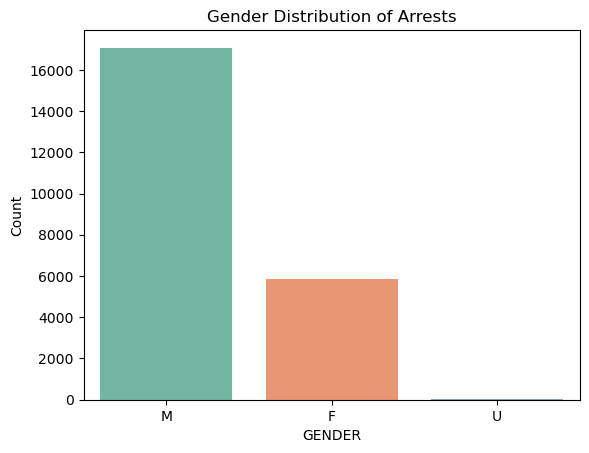

In [16]:
if "GENDER" in df.columns:
    sns.countplot(data=df, x="GENDER", palette="Set2")
    plt.title("Gender Distribution of Arrests")
    plt.ylabel("Count")
    plt.show()


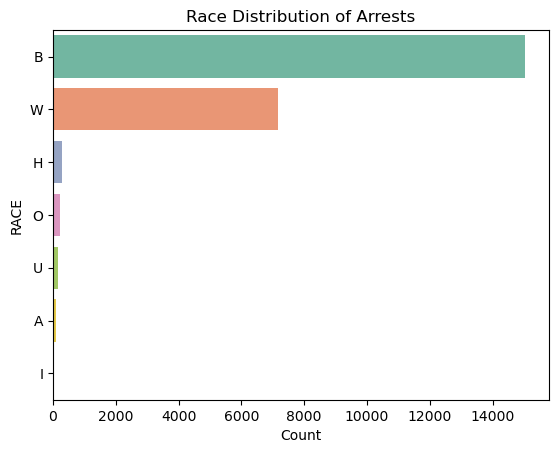

In [17]:
if "RACE" in df.columns:
    sns.countplot(data=df, y="RACE", palette="Set2", order=df["RACE"].value_counts().index)
    plt.title("Race Distribution of Arrests")
    plt.xlabel("Count")
    plt.show()


### Monthly Arrest Trends

This plot shows the total number of arrests each month, broken down by year. It helps reveal any seasonal patterns or yearly trends in the data.


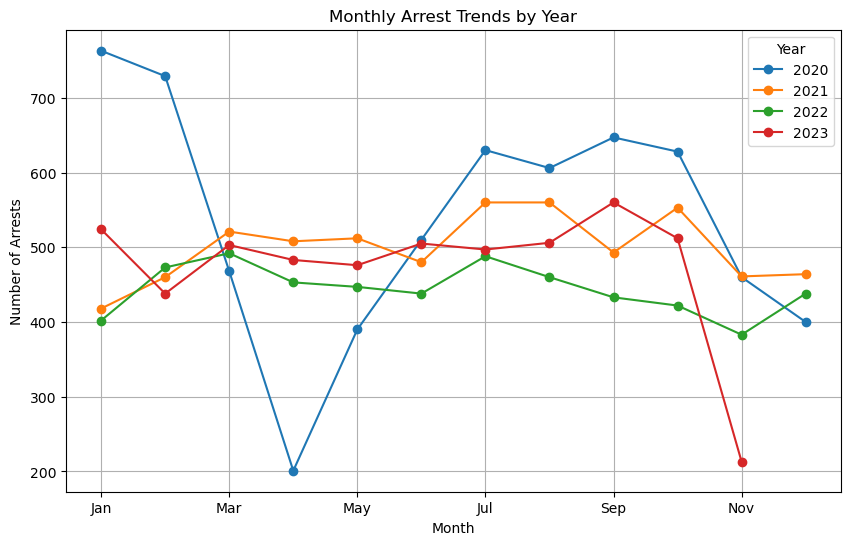

In [18]:
# Extract month and year
df["ARREST_MONTH"] = df["ARRESTTIME"].dt.month
df["ARREST_YEAR"] = df["ARRESTTIME"].dt.year

# Group by Year and Month
monthly_trends = df.groupby(["ARREST_YEAR", "ARREST_MONTH"]).size().reset_index(name="arrest_count")

# Pivot for plotting
pivot_df = monthly_trends.pivot(index="ARREST_MONTH", columns="ARREST_YEAR", values="arrest_count")
pivot_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

pivot_df.plot(marker='o', figsize=(10, 6))
plt.title("Monthly Arrest Trends by Year")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")
plt.grid(True)
plt.legend(title="Year")
plt.show()


### Arrests by Hour of the Day

This visualization displays the distribution of arrests across the 24-hour clock, helping to identify peak arrest times.


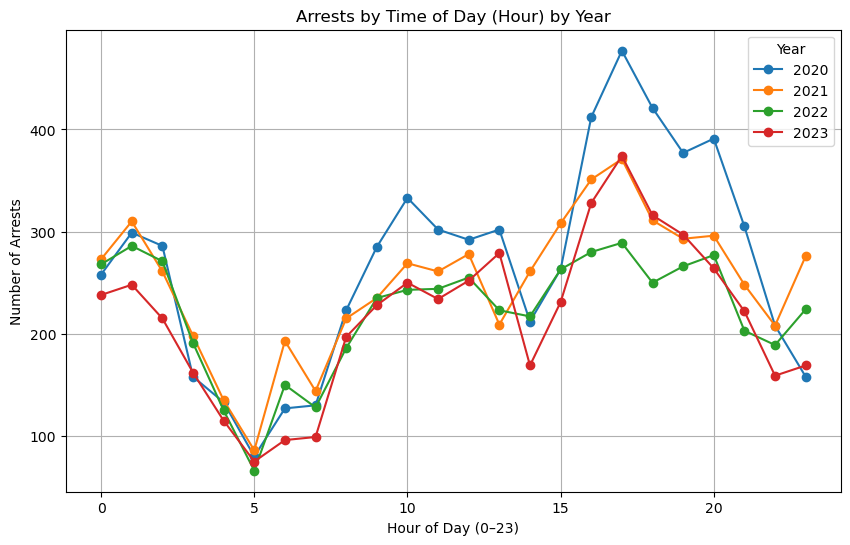

In [19]:
df["ARREST_HOUR"] = df["ARRESTTIME"].dt.hour
hourly_trends = df.groupby(["ARREST_YEAR", "ARREST_HOUR"]).size().reset_index(name="arrest_count")

# Pivot for line plot
pivot_hour = hourly_trends.pivot(index="ARREST_HOUR", columns="ARREST_YEAR", values="arrest_count")
pivot_hour.plot(marker='o', figsize=(10, 6))
plt.title("Arrests by Time of Day (Hour) by Year")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Arrests")
plt.grid(True)
plt.legend(title="Year")
plt.show()


### Top 15 Neighborhoods by Number of Arrests

This bar chart displays the neighborhoods with the highest number of arrests, in descending order. It highlights areas of potential concern for law enforcement or policy intervention.


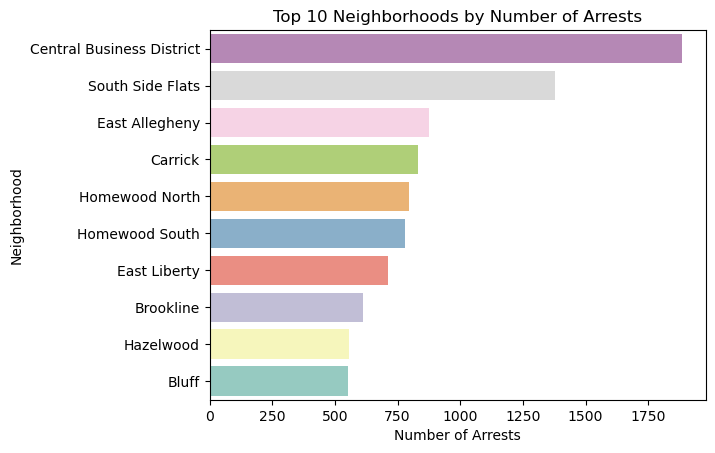

In [20]:
from seaborn import color_palette, palettes


# top_hoods = df["INCIDENTNEIGHBORHOOD"].value_counts().head(15)
sns.countplot(data=df, y="INCIDENTNEIGHBORHOOD", palette="Set3", order=df["INCIDENTNEIGHBORHOOD"].value_counts().head(10).index[::-1])

# top_hoods.plot(kind="barh", figsize=(10, 6), palettes="Viridis")
plt.title("Top 10 Neighborhoods by Number of Arrests")
plt.xlabel("Number of Arrests")
plt.ylabel("Neighborhood")
plt.gca().invert_yaxis()
plt.show()

### Neighborhood Arrest Density (Bubble Map)

Each bubble represents a neighborhood, sized and colored by the number of arrests. This helps identify geographic hotspots of criminal activity.


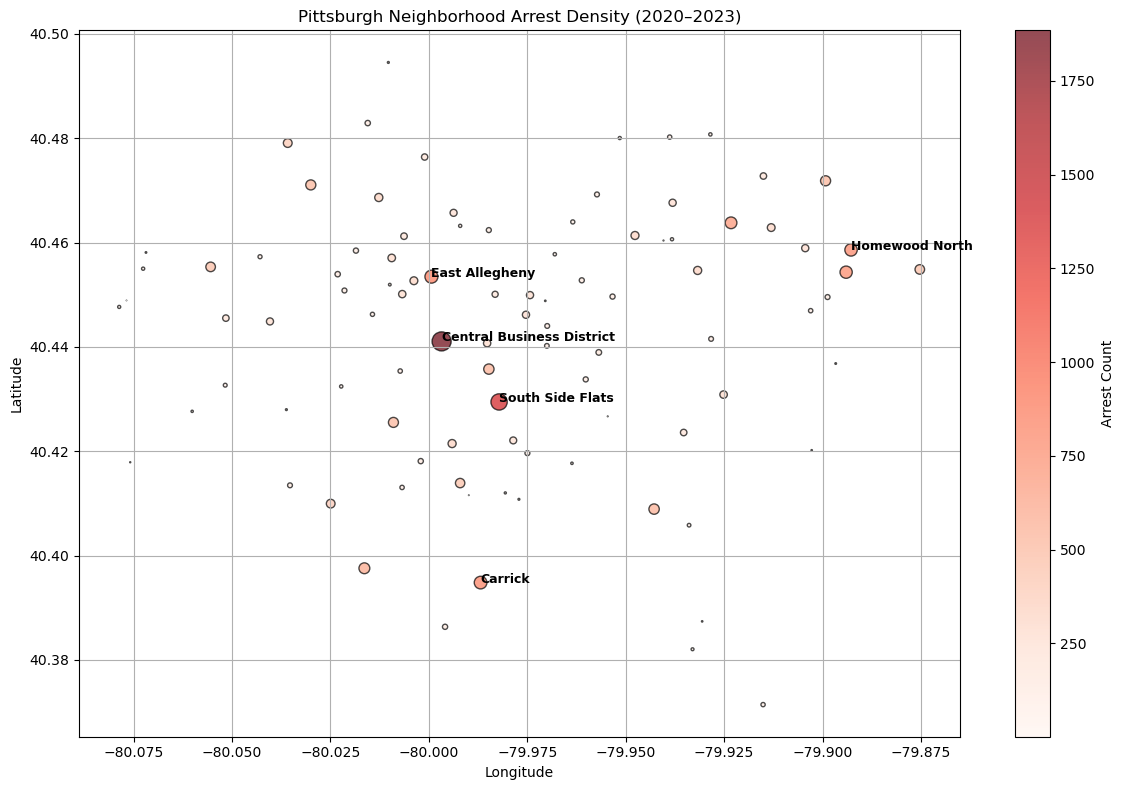

In [21]:
# Drop rows with missing or non-numeric coordinates
df = df.dropna(subset=["X", "Y"]).copy()
df["X"] = pd.to_numeric(df["X"], errors="coerce")
df["Y"] = pd.to_numeric(df["Y"], errors="coerce")
df = df.dropna(subset=["X", "Y"])

# Group by neighborhood
neighborhood_summary = df.groupby("INCIDENTNEIGHBORHOOD").agg({
    "X": "mean",
    "Y": "mean",
    "INCIDENTNEIGHBORHOOD": "count"
}).rename(columns={"INCIDENTNEIGHBORHOOD": "Arrest_Count"}).reset_index()

# Bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    neighborhood_summary["X"], neighborhood_summary["Y"],
    s=neighborhood_summary["Arrest_Count"] * 0.1,
    c=neighborhood_summary["Arrest_Count"], cmap="Reds", alpha=0.7, edgecolors="black"
)

plt.colorbar(scatter, label="Arrest Count")
plt.title("Pittsburgh Neighborhood Arrest Density (2020–2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Annotate top 5 neighborhoods
top5 = neighborhood_summary.nlargest(5, "Arrest_Count")
for _, row in top5.iterrows():
    plt.text(row["X"], row["Y"], row["INCIDENTNEIGHBORHOOD"], fontsize=9, weight='bold')

plt.tight_layout()
plt.show()


### Classification of Offenses

To support modeling, we create a new feature `offense_category` that categorizes each arrest as:

- `1` for **Violent offenses** (e.g., assault, robbery, homicide, domestic violence),
- `0` for **Non-violent offenses** (e.g., theft, drug possession, burglary),
- `-1` for **Other/uncategorized offenses**.


In [22]:
def classify_offense_category(offense):
    """
    Classifies an offense as violent (1), non-violent (0), or other (-1) 
    based on keyword matching in the offense description (lowercased).

    Parameters:
    offense (str): A string describing the offense.

    Returns:
    int: 1 for violent, 0 for non-violent, -1 for other/unknown offenses.
    """
    s = str(offense).lower()

    if re.search(r"assault|battery|homicide|murder|robbery|rape|strangulation|aggravated|domestic|terroristic|harassment|recklessly endangering|endangering welfare", s):
        return 1
    elif re.search(r"theft|burglary|larceny|shoplifting|possession|paraphernalia|drug", s):
        return 0
    else:
        return -1


df["offense_category"] = df["OFFENSES"].apply(classify_offense_category)


We define `df_clean` as the version of our dataset that includes only rows with clearly labeled offenses — either violent (1) or non-violent (0).  
Ambiguous cases labeled as `-1` are excluded to ensure clean, reliable classification training.  
This dataset will be used in all modeling steps going forward.


In [23]:
df_clean = df[df["offense_category"] != -1].copy()
df_clean.rename(columns={"offense_category": "is_violent"}, inplace=True)

is_violent
1    8470
0    6686
Name: count, dtype: int64


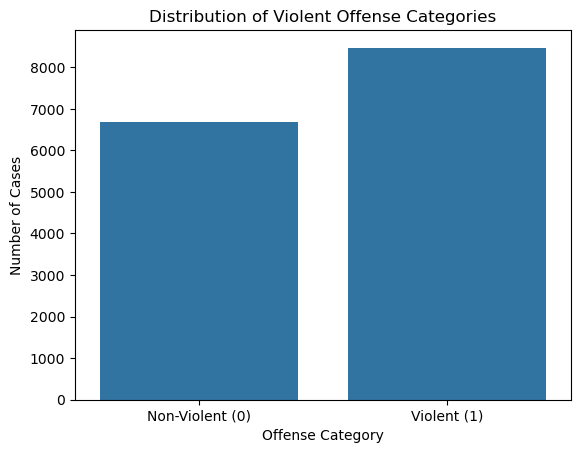

In [24]:
# Check the distribution of the binary labels

print(df_clean.is_violent.value_counts())

label_counts = df_clean["is_violent"].value_counts().sort_index()
label_counts.index = ["Non-Violent (0)", "Violent (1)"]

sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribution of Violent Offense Categories")
plt.ylabel("Number of Cases")
plt.xlabel("Offense Category")
plt.show()


### Offense Type by Age Group Using the Mapped Offense Categories

To explore how violence in arrests varies across age demographics, we group individuals into age brackets (e.g., `<18`, `18–25`, `26–35`, etc.) and visualize the distribution of violent vs. non-violent offenses within each group.

This chart helps identify which age groups are more frequently involved in violent crimes and may inform age-targeted intervention strategies.


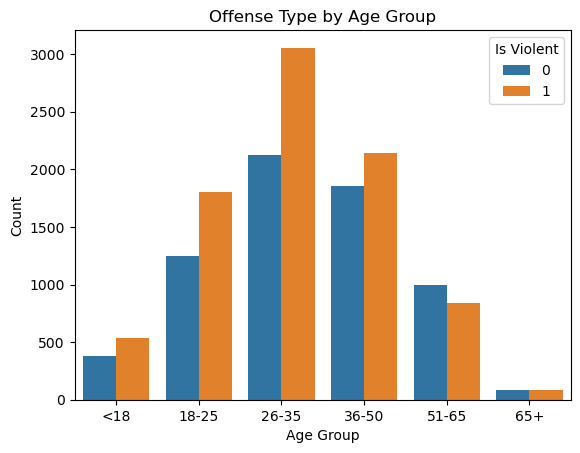

In [25]:
df_clean["age_group"] = pd.cut(df_clean["AGE"], bins=[0, 18, 25, 35, 50, 65, 100], 
                               labels=["<18", "18-25", "26-35", "36-50", "51-65", "65+"])

sns.countplot(data=df_clean, x="age_group", hue="is_violent")
plt.title("Offense Type by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Is Violent")
plt.show()


### Offense Type by Gender Using the Mapped Offense Categories

This plot compares the number of violent and non-violent arrests across different gender categories. It helps uncover any disparities or trends in arrest types between male, female, and other reported gender identities.

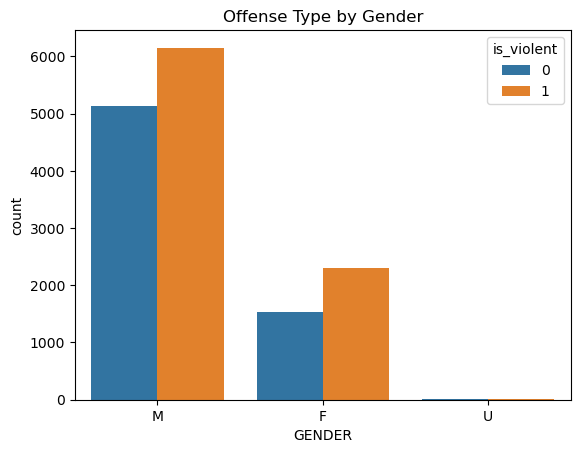

In [26]:
sns.countplot(data=df_clean, x="GENDER", hue="is_violent")
plt.title("Offense Type by Gender")
plt.show()


### Monthly Arrest Trends by Offense Type (Mapped Offense Categories)

This time series plot shows monthly trends in violent and non-violent arrests based on offense keyword classification. By grouping arrests by `ARREST_YEARMONTH`, we can observe how arrest patterns vary over time and whether violent or non-violent offenses show seasonal or temporal shifts. This visualization is useful for identifying spikes, declines, or recurring patterns in criminal activity across years.


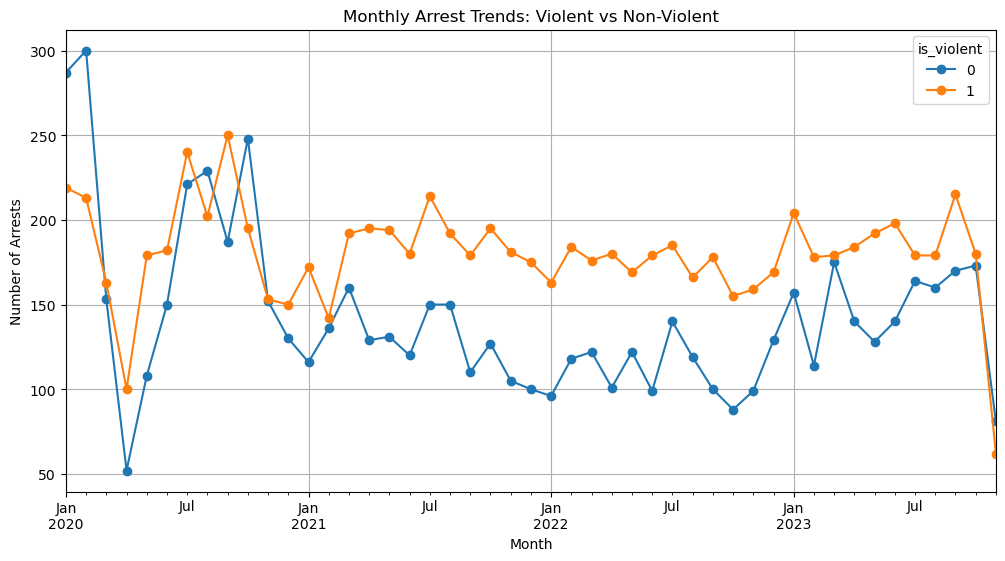

In [27]:
df_clean["ARREST_YEARMONTH"] = df_clean["ARRESTTIME"].dt.to_period("M").astype(str)

monthly_counts = df_clean.groupby(["ARREST_YEARMONTH", "is_violent"]).size().unstack(fill_value=0)

monthly_counts.index = pd.to_datetime(monthly_counts.index)

monthly_counts.plot(figsize=(12, 6), marker='o')
plt.title("Monthly Arrest Trends: Violent vs Non-Violent")
plt.ylabel("Number of Arrests")
plt.xlabel("Month")
plt.grid(True)
plt.show()


### Top 15 Neighborhoods by Number of Arrests Using the Mapped Offense Categories

This plot displays the 10 neighborhoods with the highest number of arrests, categorized by mapped offense types.


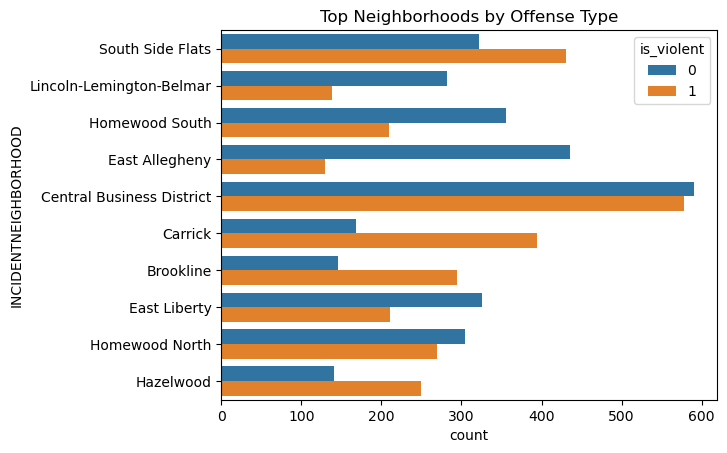

In [28]:
top_neighborhoods = df_clean["INCIDENTNEIGHBORHOOD"].value_counts().head(10).index
subset = df_clean[df_clean["INCIDENTNEIGHBORHOOD"].isin(top_neighborhoods)]

sns.countplot(data=subset, y="INCIDENTNEIGHBORHOOD", hue="is_violent")
plt.title("Top Neighborhoods by Offense Type")
plt.show()


### 📊 Correlation Heatmap of Numeric Features

This heatmap visualizes the pairwise correlations between all numeric features (excluding the target variable `is_violent`). It helps identify:
- Strongly correlated features, which might introduce redundancy or multicollinearity,
- Weak or uncorrelated features, which may offer unique signals for modeling.

This insight supports feature selection and engineering for classification and clustering tasks.


#### Preprocessing: One-Hot Encoding and Scaling

Categorical variables (`GENDER`, `RACE`, `INCIDENTNEIGHBORHOOD`, `ARREST_DAY`) are one-hot encoded.
Numerical variables (`AGE`, `ARREST_HOUR`, `X`, `Y`) are scaled using StandardScaler.
This prepares the dataset for training.


In [30]:
categorical_features = ["GENDER", "RACE", "INCIDENTNEIGHBORHOOD", "ARREST_DAY"]
numerical_features = ["AGE", "ARREST_HOUR"]

In [31]:
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ("num", StandardScaler(), numerical_features)
])

### Grouped Feature Correlation with `is_violent`

To evaluate how predictive each original feature group is, we compute the average absolute correlation between all one-hot encoded features and the binary target `is_violent`. This helps us identify which features contribute the most signal in the model.


In [32]:
X = df_clean[categorical_features + numerical_features]
y = df_clean["is_violent"]

In [33]:
# Apply transformation
X_transformed = preprocessor.fit_transform(X)

# Create DataFrame with encoded feature names
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Add target variable
X_transformed_df["is_violent"] = df_clean["is_violent"].reset_index(drop=True)


In [34]:
# Compute correlation with the target
X = X_transformed_df.drop(columns="is_violent")
y = X_transformed_df["is_violent"]
feature_corr = X.corrwith(y)

# Group correlations by original feature name (before one-hot)
grouped_corr = {}
for col in feature_corr.index:
    group = col.split("__")[1].split("_")[0]  # Extract top-level feature name
    grouped_corr.setdefault(group, []).append(feature_corr[col])

# Compute average absolute correlation per group
grouped_corr_mean = {k: np.mean(np.abs(v)) for k, v in grouped_corr.items()}
grouped_corr_series = pd.Series(grouped_corr_mean).sort_values(ascending=False)


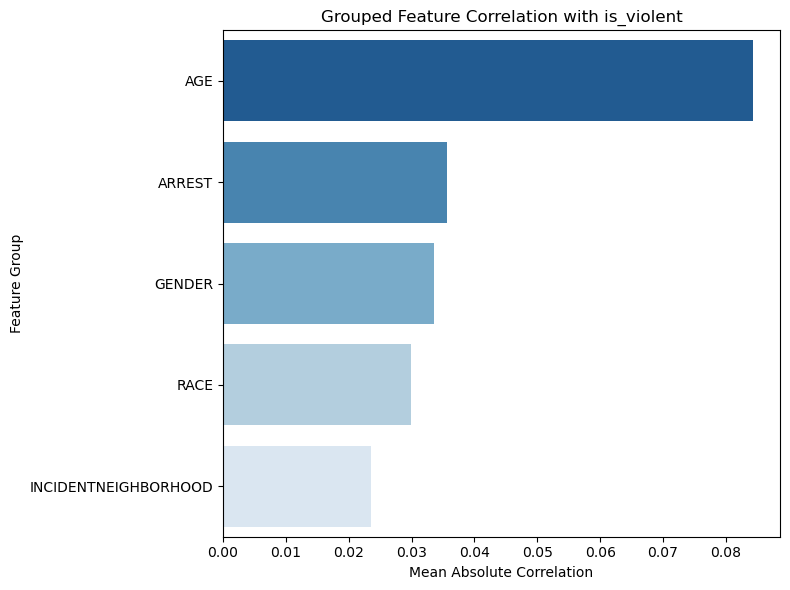

In [35]:
# Plot grouped correlation summary
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_corr_series.values, y=grouped_corr_series.index, palette="Blues_r")
plt.title("Grouped Feature Correlation with is_violent")
plt.xlabel("Mean Absolute Correlation")
plt.ylabel("Feature Group")
plt.tight_layout()
plt.show()
